# Notebook 3: Develop LSTM Model

In Notebook 2, it has labeled the sentiment "positive, negative and neutral" to the standardised sentences which was extracted from 30 UK retailers annual report (pdf file). In addition, the label of these three sentiment has been converted to numeric value which positive is 1, negative is -1, and neutral is 0 respectively.


In this notebook, first, it will tokenize and pad the sentences into sequences. And then, it will develop different LSTM models by Tensorflow and Keras.

# Tokenization and padding sequences

In [2]:
# read the csv file which stores sentence and numeric labels
import pandas as pd
df_sent_lab = pd.read_csv("dataset/sen_with_numeric_labels.csv")
df_sent_lab.head()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,sentences,labels
0,mothercare plc annual report accounts www,0
1,mothercareplc,0
2,com transformation growth,0
3,financial highlights worldwide network sales,0
4,group sales,0


In [3]:
# a short summary of the dataset "df_sent_lab"
sentcount = df_sent_lab["labels"].value_counts()
print("Print the sentiment summary of the dataset (1 = positive; 0 = neutral; negative = -1):")
print(sentcount)
print(f"\nIs there any missing and null value? Answer: {sentcount.isnull().sum()}")

Print the sentiment summary of the dataset (1 = positive; 0 = neutral; negative = -1):
labels
 1    396692
 0    301895
-1    205911
Name: count, dtype: int64

Is there any missing and null value? Answer: 0


After the above inital screening, it can tokenize the sentences and pad them as sequences.

In [4]:
# Import global nlp functions to tokenize the sentences and pad them as sequences
from nlp_functions import tokenize_pad_sequences

# Global parameters
num_words = 500 # max numbers of vocabulary 
oov_token = '<OOV>' # words that is out of the vocabulary
maxlen = 10 # max length of the sequences
padding = 'post' # padding position
truncating = 'post' # truncation position

# Extract the sentence from the dataset "df_sent_lab"
sentences = df_sent_lab["sentences"]

In [5]:
# Tokenize and padded the sentences
tokenizer, word_index, sequences, padded_sequences = tokenize_pad_sequences(sentences, 
                                                                            num_words, 
                                                                            oov_token, 
                                                                            maxlen,
                                                                            padding, 
                                                                            truncating)

2023-07-25 01:23:25.398236: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Using the global nlp function to visualise the padded sequences.

In [6]:
# Import global nlp functions for the summary
from nlp_functions import summary_tokpad

# Get the summary of the padded and tokenization for first 10 rows
summary = tokenize_pad_sequences(sentences, num_words, oov_token, maxlen, padding, truncating)
summary_tokpad(summary, 0, 10)

start index: 0
end index: 10
Summary of the tokenization and padding:

Selected Word Index:
<OOV>: 1
group: 2
financial: 3
year: 4
report: 5
company: 6
committee: 7
board: 8
directors: 9
business: 10

Selected Sentences:
[1, 25, 11, 5, 36, 1]
[1]
[395, 1, 81]
[3, 1, 1, 1, 57]
[2, 57]
[62, 253]
[26, 62, 71]
[166, 1]
[253]
[61, 223, 4, 249, 62, 253]

Selected Padded Sequences:
[ 1 25 11  5 36  1  0  0  0  0]
[1 0 0 0 0 0 0 0 0 0]
[395   1  81   0   0   0   0   0   0   0]
[ 3  1  1  1 57  0  0  0  0  0]
[ 2 57  0  0  0  0  0  0  0  0]
[ 62 253   0   0   0   0   0   0   0   0]
[26 62 71  0  0  0  0  0  0  0]
[166   1   0   0   0   0   0   0   0   0]
[253   0   0   0   0   0   0   0   0   0]
[ 61 223   4 249  62 253   0   0   0   0]


# Spliting the dataset

Split the dataset into X_training, X_test, Y_training and Y_test for modelling and validation. 
In details, X_training is training_sequences, X_test is testing_sequences, Y_training is training_labels, Y_test is testing_labels, respectively.

First, it splits the training sequences and testing sequences.

In [7]:
# parameters setting
training_size = 0.8
labels = df_sent_lab["labels"]
sequences = padded_sequences

# Split the sequences into training and testing dataset
from nlp_functions import split_the_dataset
training_sequences, testing_sequences = split_the_dataset(sequences, training_size)

In [8]:
# Print the training sequences dataset
print(f"There are {len(training_sequences)} in the training sequences data.")
print("The following are the training sequences: ")
print(training_sequences)

# Print the testing sequences dataset
print("")
print("")
print(f"There are {len(testing_sequences)} in the testing sequences data.")
print("The following are the testing sequences: ")
print(testing_sequences)

There are 723598 in the training sequences data.
The following are the training sequences: 
[[329   1   1 ... 207 208  22]
 [  1   1   1 ...   1   1   1]
 [ 74  78   1 ...  78   1 203]
 ...
 [ 50   1   1 ...   1   0   0]
 [126 238   1 ...   1   1  45]
 [  1   5 381 ...   0   0   0]]


There are 180900 in the testing sequences data.
The following are the testing sequences: 
[[128   0   0 ...   0   0   0]
 [249 188  19 ...  50 190 273]
 [  1   1   1 ...  23   1  16]
 ...
 [  1   1 201 ...  48   1   1]
 [  1   1   1 ...   1   1 214]
 [ 20  14  90 ...   0   0   0]]


Next, it splits the training lables and testing labels datasets.

In [9]:
# Split the labels into training and testing dataset
training_labels, testing_labels = split_the_dataset(labels, training_size)

In [10]:
# Print the training labels dataset
print(f"There are {len(training_labels)} in the training labels data.")
print("The following are the training labels: ")
print(training_labels)

# Print the testing labels dataset
print("")
print("")
print(f"There are {len(testing_labels)} in the testing labels data.")
print("The following are the testing labels: ")
print(testing_labels)

There are 723598 in the training labels data.
The following are the training labels: 
145206    1
488489    1
333331    1
658478    0
700643    0
         ..
259178    1
365838    0
131932    1
671155    1
121958    0
Name: labels, Length: 723598, dtype: int64


There are 180900 in the testing labels data.
The following are the testing labels: 
347497    0
840078    1
289955   -1
861028    1
901240    1
         ..
758540    1
7624     -1
313781    1
476891    1
240607    1
Name: labels, Length: 180900, dtype: int64


Before developing models, it sets up a global function to visualise the validation during the training and validation process.

In [11]:
import matplotlib.pyplot as plt

# Plot functions
def plot_graphs(model, string):
  plt.plot(model.history[string])
  plt.plot(model.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# LSTM Model

LSTM, the Long Short-Term Memory model, is one of the sequential models widely used in NLP. It is a variant of a recurrent neural network and is used to process input data in a sequential manner. In NLP, the input sequence can be sentences or paragraphs. In detail, LSTM can process each element of the input sequences one at a time and then maintains an internal memory state that can capture and retain relevant information over time. This feature allows LSTM to handle varying lengths and capture long-term dependencies during sentiment analysis.

Furthermore, the LSTM model takes longer to train, but it can capture the order of the tokens. In sentiment analysis on financial risk, LSTM can capture the temporal dependencies that allow the model to understand the evolution of sentiment over time. Additionally, it can capture contextual information in a paragraph. Sometimes, the sentiment of a sentence can be influenced by preceding sentences. LSTM can incorporate the paragraph or reporting context into the process.

1. Embedding Layer: An input layer, converting the input into dense vectors, the numeric representation of the sentences. It specifies num_words, which is the total number of frequent/unique words from the dataset. embedding_dim specifies the dimensionality of the word embeddings. 

2. input_length specifies the length of the input sequences, which is usually the maximum sequence length in the dataset.

3. Bidirectional LSTM Layer: The bidirectional wrapper allows the LSTM layer to process input sequences in both forward and backward directions, capturing contextual information from past and future words. 

4. lstm_dim represents the number of LSTM units in each direction, determining the capacity and complexity of the LSTM layer. It is common to use a bidirectional LSTM layer in NLP because language is sequential, and the meaning of a word can be affected by surrounding words. It allows the model to capture contextual information.

5. Dense Layer (Intermediate Layer): This layer introduces non-linearity (if using ReLU activation) before the output layer. It can be seen as a linear transformation of the LSTM layer output.

6. Dense Layer (Output Layer): Different activation functions can generate a different number of outputs. For sigmoid activation, it produces a single output value between 0 and 1. Since there are 3 sentiment label classifications, it will use softmax activation instead.

7. Loss Function: A measure of model performance, quantifying the discrepancy between predicted output and actual output.

8. Optimizer: Determines how the model's weights are being updated. Adam is a popular optimizer due to faster convergence and improved performance.

9. Metrics: A performance evaluation metric. Accuracy calculates the percentage of correct predictions.

## 1st LSTM model

In [12]:
# Hyperparameters
embedding_dim = 10 # each word will be represented by a dense vector of specified size
lstm_dim = 12 # number of LSTM units
dense_dim = 12 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences


In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential

Before specify the model definition, it should covert the label as one-hot encoded format. It can work with categorical_crossentropy loss function as this function only read labels at one-hot encoded format and it cannot process any negative value.

One-hot encoding: It is a process of converting the numeric categorical variables as binary vectors as follows:

-1 = [1,0,0]  
0 = [0,1,0]  
1 = [0,0,1]
. 

In [14]:
from tensorflow.keras.utils import to_categorical

# Convert target labels to one-hot encoding
training_labels_encoded = to_categorical(training_labels, num_classes=3)
testing_labels_encoded = to_categorical(testing_labels, num_classes=3)

In [15]:
# Build the model
lstm_model_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
lstm_model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
lstm_model_1.summary()

2023-07-25 01:25:37.534528: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 10)            5000      
                                                                 
 bidirectional (Bidirectiona  (None, 24)               2208      
 l)                                                              
                                                                 
 dense (Dense)               (None, 12)                300       
                                                                 
 dense_1 (Dense)             (None, 3)                 39        
                                                                 
Total params: 7,547
Trainable params: 7,547
Non-trainable params: 0
_________________________________________________________________


Since it is processing the complicated dataset and model arhcitecture, it specify 30 epochs and 128 batch size to capture complexity while minising the computational consumption.

In [16]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fitting the model 
lstm_model_1_history = lstm_model_1.fit(training_sequences, training_labels_encoded, 
                    epochs=NUM_EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_data=(testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 29s 5ms/step - loss: 0.5364 - accuracy: 0.7503 - val_loss: 0.5057 - val_accuracy: 0.7606
Epoch 2/30
5654/5654 [==============================] - 26s 5ms/step - loss: 0.4998 - accuracy: 0.7646 - val_loss: 0.4990 - val_accuracy: 0.7642
Epoch 3/30
5654/5654 [==============================] - 26s 5ms/step - loss: 0.4947 - accuracy: 0.7671 - val_loss: 0.4984 - val_accuracy: 0.7634
Epoch 4/30
5654/5654 [==============================] - 27s 5ms/step - loss: 0.4911 - accuracy: 0.7696 - val_loss: 0.4925 - val_accuracy: 0.7682
Epoch 5/30
5654/5654 [==============================] - 27s 5ms/step - loss: 0.4879 - accuracy: 0.7713 - val_loss: 0.4900 - val_accuracy: 0.7699
Epoch 6/30
5654/5654 [==============================] - 27s 5ms/step - loss: 0.4850 - accuracy: 0.7736 - val_loss: 0.4890 - val_accuracy: 0.7715
Epoch 7/30
5654/5654 [==============================] - 27s 5ms/step - loss: 0.4825 - accuracy: 0.7752 - val_loss: 0.4870 - val_ac

Next, it visualises the training accuracy and loss over time after the model training.  

1. Training accuracy: Assessing the model performance accuracy on the training dataset. High accuracy means the model performs well on the training data itself.
2. Validation accuracy: Assessing the model performance on the validation dataset. High validation accuracy means the model performs well on unseen data.
3. Training loss: It can be defined as the measure of model performance fitting on the training data by assessing the discrepancy between predicted and actual value. It could be decreased gradually during the training process when the model is learning to fit the training data.
4. Validation loss: It can be defined as the measure of model generalizing the unseen data.

Overfitting assessment: To assess overfitting, the training loss should be decreasing gradually while the validation loss is increasing.

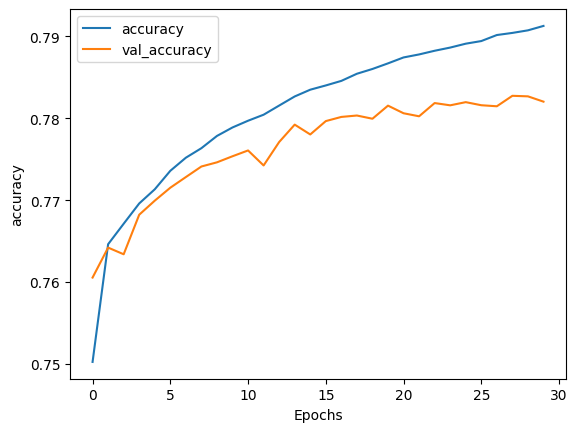

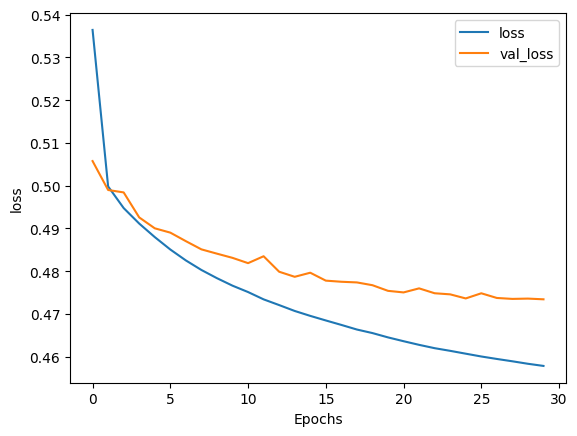

In [18]:
# Plot the accuracy and results 
plot_graphs(lstm_model_1_history, "accuracy")
plot_graphs(lstm_model_1_history, "loss")

The model "lstm_model_1" summary:

1. Training accuracy: 84% 
2. Validation accuracy: 82% 
3. Total training time: around 16 mins for 30 epochs and 128 batch size. 
4. Validation: Pass

Next, it create a dataframe to visualise the comparison of the models.

In [19]:
import pandas as pd

# Data for multiple rows
data = {
    "Models": ["lstm_model_1"],
    "Train Acc (%)": [84],
    "Val. Acc (%)": [82],
    "Train Time (mins)": [16],
    "Validation": ["Pass"]
}

# Create a pandas DataFrame
df_comp_models = pd.DataFrame(data)

# Print the table without index numbers
print(df_comp_models.to_string(index=False))

      Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
lstm_model_1             84            82                 16       Pass


## 2nd LSTM model

In [20]:
# Hyperparameters
embedding_dim = 24 # dim of dense vector of word representation
lstm_dim = 24 # nums of LSTM units
dense_dim = 24 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [21]:
# Build the model
lstm_model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_2.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 24)            12000     
                                                                 
 bidirectional_1 (Bidirectio  (None, 48)               9408      
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 24)                1176      
                                                                 
 dense_3 (Dense)             (None, 3)                 75        
                                                                 
Total params: 22,659
Trainable params: 22,659
Non-trainable params: 0
_________________________________________________________________


In [22]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_2_history = lstm_model_2.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 30s 5ms/step - loss: 0.5227 - accuracy: 0.7554 - val_loss: 0.5047 - val_accuracy: 0.7590
Epoch 2/30
5654/5654 [==============================] - 27s 5ms/step - loss: 0.4957 - accuracy: 0.7667 - val_loss: 0.4959 - val_accuracy: 0.7667
Epoch 3/30
5654/5654 [==============================] - 27s 5ms/step - loss: 0.4873 - accuracy: 0.7713 - val_loss: 0.4892 - val_accuracy: 0.7701
Epoch 4/30
5654/5654 [==============================] - 27s 5ms/step - loss: 0.4795 - accuracy: 0.7766 - val_loss: 0.4819 - val_accuracy: 0.7755
Epoch 5/30
5654/5654 [==============================] - 27s 5ms/step - loss: 0.4726 - accuracy: 0.7810 - val_loss: 0.4760 - val_accuracy: 0.7795
Epoch 6/30
5654/5654 [==============================] - 27s 5ms/step - loss: 0.4663 - accuracy: 0.7853 - val_loss: 0.4732 - val_accuracy: 0.7817
Epoch 7/30
5654/5654 [==============================] - 28s 5ms/step - loss: 0.4607 - accuracy: 0.7891 - val_loss: 0.4702 - val_ac

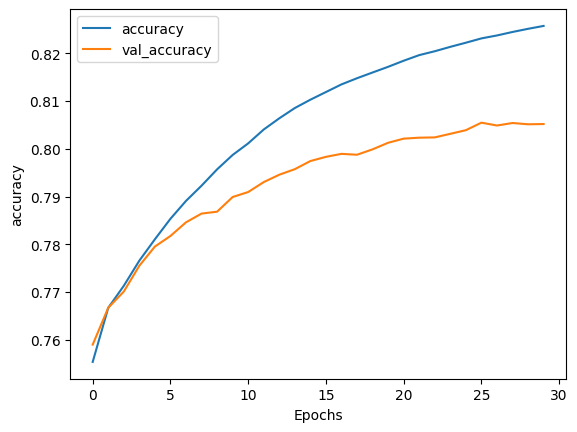

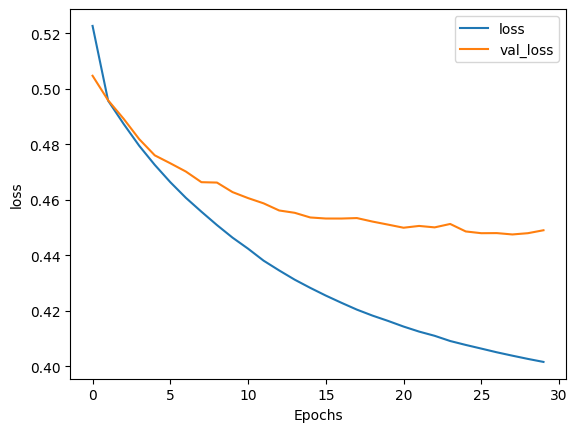

In [23]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_2_history, 'accuracy')
plot_graphs(lstm_model_2_history, 'loss')

The model "lstm_model_2" summary:

1. Training accuracy: 83% 
2. Validation accuracy: 81% 
3. Total training time: around 14 mins for 30 epochs and 128 batch size. 
4. Validation: Pass

Add the result to the dataframe for visualising the comparison.

In [24]:
# Creat a function to add row for the above models
def add_row(df, model, train_acc, val_acc, train_time, validation):
    new_row = {
        "Models": model,
        "Train Acc (%)": train_acc,
        "Val. Acc (%)": val_acc,
        "Train Time (mins)": train_time,
        "Validation": validation
    }
    df.loc[len(df)] = new_row
    return df


In [25]:
# Call the function to add a new row
df_comp_models = add_row(df_comp_models, "lstm_model_2", 83, 81, 14, "Pass")

# Print the updated DataFrame
print(df_comp_models.to_string(index=False))

      Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
lstm_model_1             84            82                 16       Pass
lstm_model_2             83            81                 14       Pass


## 3rd LSTM model

In [26]:
# Hyperparameters
embedding_dim = 64 # dim of dense vector of word representation
lstm_dim = 64 # nums of LSTM units
dense_dim = 64 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [27]:
# Build the model
lstm_model_3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_3.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10, 64)            32000     
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 106,499
Trainable params: 106,499
Non-trainable params: 0
_________________________________________________________________


In [28]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_3_history = lstm_model_3.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 57s 10ms/step - loss: 0.5146 - accuracy: 0.7585 - val_loss: 0.4984 - val_accuracy: 0.7627
Epoch 2/30
5654/5654 [==============================] - 54s 10ms/step - loss: 0.4877 - accuracy: 0.7714 - val_loss: 0.4850 - val_accuracy: 0.7741
Epoch 3/30
5654/5654 [==============================] - 56s 10ms/step - loss: 0.4733 - accuracy: 0.7807 - val_loss: 0.4742 - val_accuracy: 0.7806
Epoch 4/30
5654/5654 [==============================] - 56s 10ms/step - loss: 0.4578 - accuracy: 0.7908 - val_loss: 0.4619 - val_accuracy: 0.7886
Epoch 5/30
5654/5654 [==============================] - 55s 10ms/step - loss: 0.4410 - accuracy: 0.8013 - val_loss: 0.4522 - val_accuracy: 0.7978
Epoch 6/30
5654/5654 [==============================] - 55s 10ms/step - loss: 0.4246 - accuracy: 0.8113 - val_loss: 0.4403 - val_accuracy: 0.8044
Epoch 7/30
5654/5654 [==============================] - 55s 10ms/step - loss: 0.4092 - accuracy: 0.8201 - val_loss: 0.4343 -

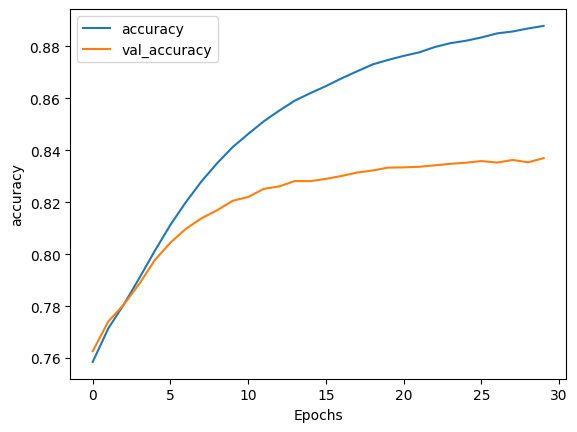

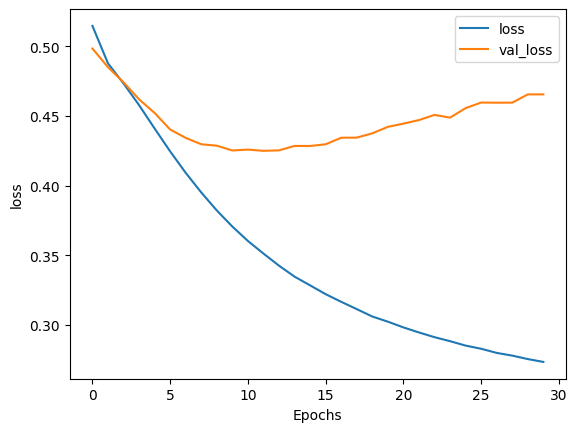

In [29]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_3_history, 'accuracy')
plot_graphs(lstm_model_3_history, 'loss')

The model "lstm_model_3" summary:

1. Training accuracy: 89% 
2. Validation accuracy: 84% 
3. Total training time: around 27 mins for 30 epochs and 128 batch size. 
4. Validation: Pass

In [30]:
# Call the function to add a new row
df_comp_models = add_row(df_comp_models, "lstm_model_3", 89, 84, 27, "Pass")

# Print the updated DataFrame
print(df_comp_models.to_string(index=False))

      Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
lstm_model_1             84            82                 16       Pass
lstm_model_2             83            81                 14       Pass
lstm_model_3             89            84                 27       Pass


## 4th LSTM model

In [31]:
# Hyperparameters
embedding_dim = 74 # dim of dense vector of word representation
lstm_dim = 74 # nums of LSTM units
dense_dim = 74 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [32]:
# Build the model
lstm_model_4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_4.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 10, 74)            37000     
                                                                 
 bidirectional_3 (Bidirectio  (None, 148)              88208     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 74)                11026     
                                                                 
 dense_7 (Dense)             (None, 3)                 225       
                                                                 
Total params: 136,459
Trainable params: 136,459
Non-trainable params: 0
_________________________________________________________________


In [33]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128


# Fit the model
lstm_model_4_history = lstm_model_4.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 67s 12ms/step - loss: 0.5124 - accuracy: 0.7595 - val_loss: 0.4969 - val_accuracy: 0.7636
Epoch 2/30
5654/5654 [==============================] - 65s 11ms/step - loss: 0.4853 - accuracy: 0.7735 - val_loss: 0.4816 - val_accuracy: 0.7761
Epoch 3/30
5654/5654 [==============================] - 65s 11ms/step - loss: 0.4696 - accuracy: 0.7836 - val_loss: 0.4696 - val_accuracy: 0.7833
Epoch 4/30
5654/5654 [==============================] - 65s 11ms/step - loss: 0.4518 - accuracy: 0.7948 - val_loss: 0.4556 - val_accuracy: 0.7928
Epoch 5/30
5654/5654 [==============================] - 65s 11ms/step - loss: 0.4328 - accuracy: 0.8063 - val_loss: 0.4456 - val_accuracy: 0.8002
Epoch 6/30
5654/5654 [==============================] - 65s 11ms/step - loss: 0.4140 - accuracy: 0.8174 - val_loss: 0.4346 - val_accuracy: 0.8091
Epoch 7/30
5654/5654 [==============================] - 66s 12ms/step - loss: 0.3967 - accuracy: 0.8269 - val_loss: 0.4276 -

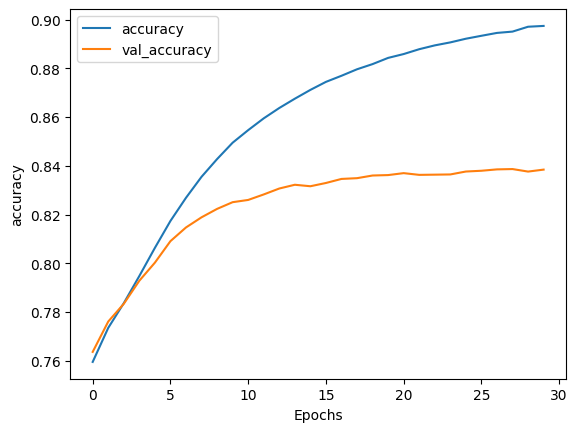

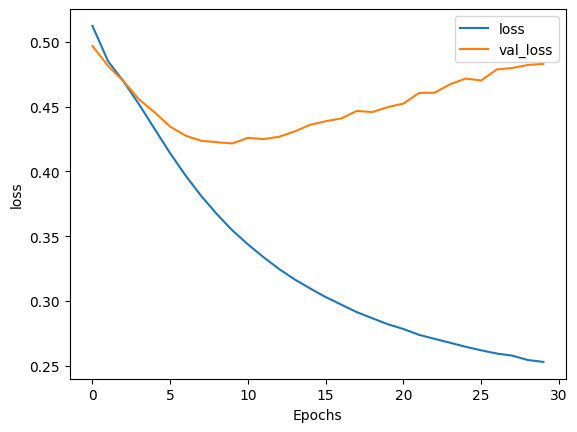

In [34]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_4_history , 'accuracy')
plot_graphs(lstm_model_4_history , 'loss')

The model "lstm_model_4" summary:

1. Training accuracy: 90% 
2. Validation accuracy: 84% 
3. Total training time: around 32 mins for 30 epochs and 128 batch size. 
4. Validation: Pass

In [35]:
# Call the function to add a new row
df_comp_models = add_row(df_comp_models, "lstm_model_4", 90, 84, 32, "Pass")

# Print the updated DataFrame
print(df_comp_models.to_string(index=False))

      Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
lstm_model_1             84            82                 16       Pass
lstm_model_2             83            81                 14       Pass
lstm_model_3             89            84                 27       Pass
lstm_model_4             90            84                 32       Pass


## 5th LSTM model

In [36]:
# Hyperparameters
embedding_dim = 108 # dim of dense vector of word representation
lstm_dim = 108 # nums of LSTM units
dense_dim = 108 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [37]:
# Build the model
lstm_model_5 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_5.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 10, 108)           54000     
                                                                 
 bidirectional_4 (Bidirectio  (None, 216)              187488    
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 108)               23436     
                                                                 
 dense_9 (Dense)             (None, 3)                 327       
                                                                 
Total params: 265,251
Trainable params: 265,251
Non-trainable params: 0
_________________________________________________________________


In [38]:
# set seed
import numpy as np
np.random.seed(42)

NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_5_history = lstm_model_5.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 97s 17ms/step - loss: 0.5112 - accuracy: 0.7603 - val_loss: 0.4952 - val_accuracy: 0.7649
Epoch 2/30
5654/5654 [==============================] - 95s 17ms/step - loss: 0.4816 - accuracy: 0.7753 - val_loss: 0.4766 - val_accuracy: 0.7788
Epoch 3/30
5654/5654 [==============================] - 94s 17ms/step - loss: 0.4600 - accuracy: 0.7891 - val_loss: 0.4597 - val_accuracy: 0.7906
Epoch 4/30
5654/5654 [==============================] - 95s 17ms/step - loss: 0.4350 - accuracy: 0.8046 - val_loss: 0.4418 - val_accuracy: 0.8026
Epoch 5/30
5654/5654 [==============================] - 95s 17ms/step - loss: 0.4083 - accuracy: 0.8209 - val_loss: 0.4295 - val_accuracy: 0.8118
Epoch 6/30
5654/5654 [==============================] - 95s 17ms/step - loss: 0.3832 - accuracy: 0.8348 - val_loss: 0.4201 - val_accuracy: 0.8213
Epoch 7/30
5654/5654 [==============================] - 95s 17ms/step - loss: 0.3611 - accuracy: 0.8462 - val_loss: 0.4153 -

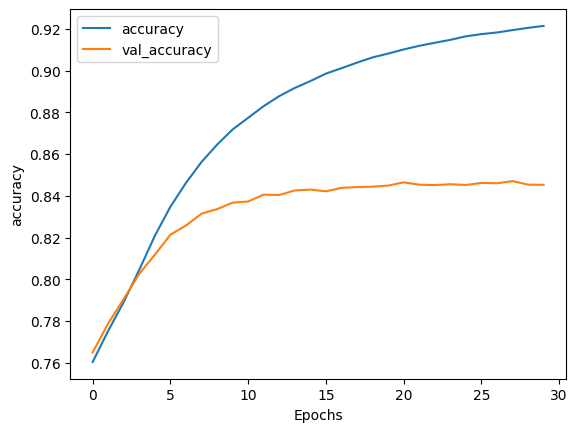

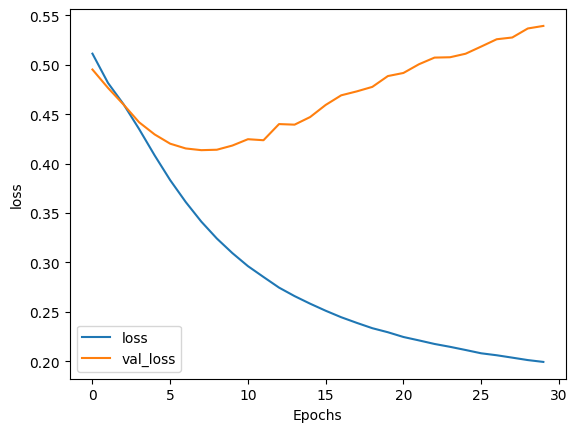

In [39]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_5_history, 'accuracy')
plot_graphs(lstm_model_5_history, 'loss')

The model "lstm_model_5" summary:

1. Training accuracy: 92% 
2. Validation accuracy: 85% 
3. Total training time: around 47 mins for 30 epochs and 128 batch size. 
4. Validation: Failed. This model is overfitted as the validation loss is increased while the training loss is decreased.



In [40]:
# Call the function to add a new row
df_comp_models = add_row(df_comp_models, "lstm_model_5", 92, 85, 47, "Fail")

# Print the updated DataFrame
print(df_comp_models.to_string(index=False))

      Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
lstm_model_1             84            82                 16       Pass
lstm_model_2             83            81                 14       Pass
lstm_model_3             89            84                 27       Pass
lstm_model_4             90            84                 32       Pass
lstm_model_5             92            85                 47       Fail


# Model Optimization

The above model analysis of different LSTM models indicate that the thrid model "lstm_model_3". Next, it will optimize the model "lstm_model_3" to reduce the computational cost.

Firstly, it will adjust the list_dim hyperparameter.

## LSTM 3.1 model

In [41]:
# Hyperparameters
embedding_dim = 64 # dim of dense vector of word representation
lstm_dim = 54 # nums of LSTM units
dense_dim = 64 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [42]:
# Build the model
lstm_model_3_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_3_1.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_3_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 10, 64)            32000     
                                                                 
 bidirectional_5 (Bidirectio  (None, 108)              51408     
 nal)                                                            
                                                                 
 dense_10 (Dense)            (None, 64)                6976      
                                                                 
 dense_11 (Dense)            (None, 3)                 195       
                                                                 
Total params: 90,579
Trainable params: 90,579
Non-trainable params: 0
_________________________________________________________________


In [43]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_3_1_history = lstm_model_3_1.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 52s 9ms/step - loss: 0.5143 - accuracy: 0.7588 - val_loss: 0.4990 - val_accuracy: 0.7617
Epoch 2/30
5654/5654 [==============================] - 50s 9ms/step - loss: 0.4873 - accuracy: 0.7719 - val_loss: 0.4839 - val_accuracy: 0.7744
Epoch 3/30
5654/5654 [==============================] - 50s 9ms/step - loss: 0.4734 - accuracy: 0.7805 - val_loss: 0.4756 - val_accuracy: 0.7797
Epoch 4/30
5654/5654 [==============================] - 50s 9ms/step - loss: 0.4590 - accuracy: 0.7897 - val_loss: 0.4627 - val_accuracy: 0.7890
Epoch 5/30
5654/5654 [==============================] - 50s 9ms/step - loss: 0.4440 - accuracy: 0.7998 - val_loss: 0.4541 - val_accuracy: 0.7954
Epoch 6/30
5654/5654 [==============================] - 50s 9ms/step - loss: 0.4296 - accuracy: 0.8086 - val_loss: 0.4459 - val_accuracy: 0.8011
Epoch 7/30
5654/5654 [==============================] - 50s 9ms/step - loss: 0.4157 - accuracy: 0.8169 - val_loss: 0.4386 - val_ac

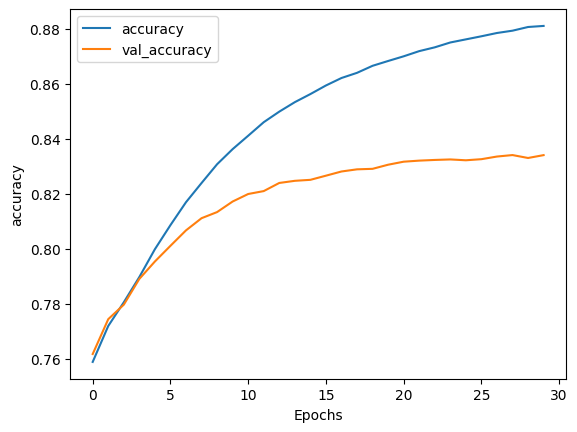

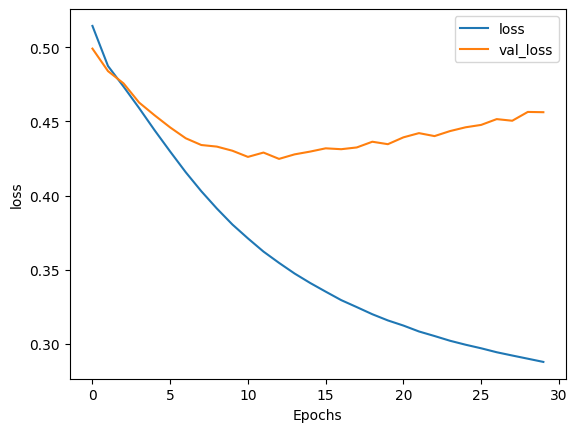

In [44]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_3_1_history, 'accuracy')
plot_graphs(lstm_model_3_1_history, 'loss')

The model "lstm_model_3_1" summary:

1. Training accuracy: 88% 
2. Validation accuracy: 83% 
3. Total training time: around 25 mins for 30 epochs and 128 batch size. 
4. Validation: Pass

In [45]:
# Data
data = {
    "Models": ["lstm_model_3"],
    "Train Acc (%)": [89],
    "Val. Acc (%)": [84],
    "Train Time (mins)": [27],
    "Validation": ["Pass"]
}

# Create a pandas DataFrame
df_opt_models = pd.DataFrame(data)

In [46]:
# Call the function to add a new row
df_opt_models = add_row(df_opt_models, "lstm_model_3_1", 88, 83, 25, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

        Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
  lstm_model_3             89            84                 27       Pass
lstm_model_3_1             88            83                 25       Pass


## LSTM 3.2 model

In [47]:
# Hyperparameters
embedding_dim = 64 # dim of dense vector of word representation
lstm_dim = 44 # nums of LSTM units
dense_dim = 64 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [48]:
# Build the model
lstm_model_3_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_3_2.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_3_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 10, 64)            32000     
                                                                 
 bidirectional_6 (Bidirectio  (None, 88)               38368     
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 64)                5696      
                                                                 
 dense_13 (Dense)            (None, 3)                 195       
                                                                 
Total params: 76,259
Trainable params: 76,259
Non-trainable params: 0
_________________________________________________________________


In [49]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_3_2_history = lstm_model_3_2.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 46s 8ms/step - loss: 0.5144 - accuracy: 0.7589 - val_loss: 0.4996 - val_accuracy: 0.7631
Epoch 2/30
5654/5654 [==============================] - 44s 8ms/step - loss: 0.4880 - accuracy: 0.7712 - val_loss: 0.4862 - val_accuracy: 0.7719
Epoch 3/30
5654/5654 [==============================] - 44s 8ms/step - loss: 0.4746 - accuracy: 0.7798 - val_loss: 0.4791 - val_accuracy: 0.7774
Epoch 4/30
5654/5654 [==============================] - 44s 8ms/step - loss: 0.4603 - accuracy: 0.7887 - val_loss: 0.4635 - val_accuracy: 0.7871
Epoch 5/30
5654/5654 [==============================] - 44s 8ms/step - loss: 0.4459 - accuracy: 0.7980 - val_loss: 0.4550 - val_accuracy: 0.7947
Epoch 6/30
5654/5654 [==============================] - 44s 8ms/step - loss: 0.4322 - accuracy: 0.8069 - val_loss: 0.4472 - val_accuracy: 0.8006
Epoch 7/30
5654/5654 [==============================] - 44s 8ms/step - loss: 0.4196 - accuracy: 0.8142 - val_loss: 0.4428 - val_ac

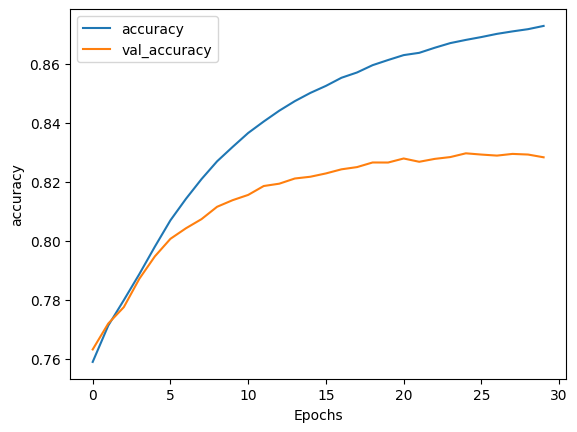

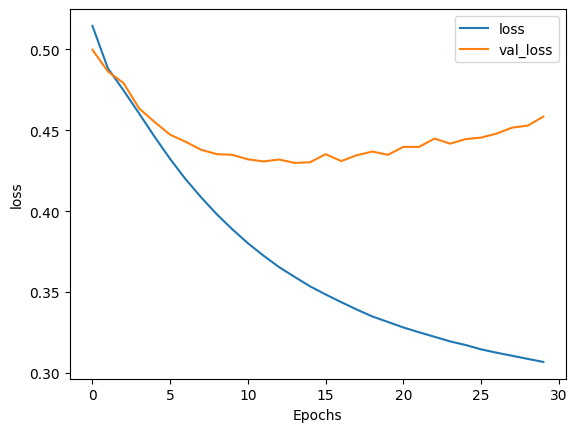

In [50]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_3_2_history, 'accuracy')
plot_graphs(lstm_model_3_2_history, 'loss')

The model "lstm_model_3_2" summary:

1. Training accuracy: 87% 
2. Validation accuracy: 83% 
3. Total training time: around 22 mins for 30 epochs and 128 batch size. 
4. Validation: Pass

In [51]:
# Call the function to add a new row
df_opt_models = add_row(df_opt_models, "lstm_model_3_2", 87, 83, 22, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

        Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
  lstm_model_3             89            84                 27       Pass
lstm_model_3_1             88            83                 25       Pass
lstm_model_3_2             87            83                 22       Pass


## LSTM 3.3 model

In [52]:
# Hyperparameters
embedding_dim = 64 # dim of dense vector of word representation
lstm_dim = 34 # nums of LSTM units
dense_dim = 64 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [53]:
# Build the model
lstm_model_3_3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_3_3.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_3_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 10, 64)            32000     
                                                                 
 bidirectional_7 (Bidirectio  (None, 68)               26928     
 nal)                                                            
                                                                 
 dense_14 (Dense)            (None, 64)                4416      
                                                                 
 dense_15 (Dense)            (None, 3)                 195       
                                                                 
Total params: 63,539
Trainable params: 63,539
Non-trainable params: 0
_________________________________________________________________


In [54]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_3_3_history = lstm_model_3_3.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 39s 7ms/step - loss: 0.5152 - accuracy: 0.7585 - val_loss: 0.4992 - val_accuracy: 0.7623
Epoch 2/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4876 - accuracy: 0.7716 - val_loss: 0.4869 - val_accuracy: 0.7711
Epoch 3/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4747 - accuracy: 0.7797 - val_loss: 0.4765 - val_accuracy: 0.7784
Epoch 4/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4622 - accuracy: 0.7881 - val_loss: 0.4661 - val_accuracy: 0.7864
Epoch 5/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4505 - accuracy: 0.7957 - val_loss: 0.4604 - val_accuracy: 0.7904
Epoch 6/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4387 - accuracy: 0.8034 - val_loss: 0.4517 - val_accuracy: 0.7970
Epoch 7/30
5654/5654 [==============================] - 37s 6ms/step - loss: 0.4273 - accuracy: 0.8104 - val_loss: 0.4471 - val_ac

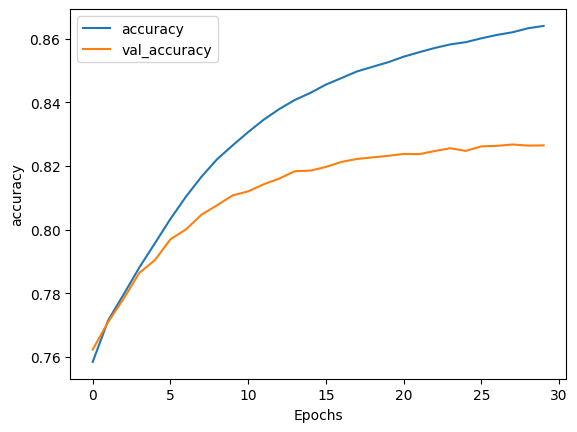

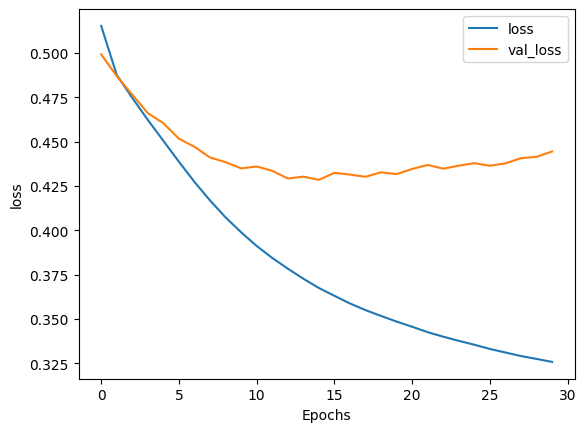

In [55]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_3_3_history, 'accuracy')
plot_graphs(lstm_model_3_3_history, 'loss')

The model "lstm_model_3_3" summary:

1. Training accuracy: 86% 
2. Validation accuracy: 83% 
3. Total training time: around 18 mins for 30 epochs and 128 batch size. 
4. Validation: Pass

In [56]:
# Call the function to add a new row
df_opt_models = add_row(df_opt_models, "lstm_model_3_3", 86, 83, 18, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

        Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
  lstm_model_3             89            84                 27       Pass
lstm_model_3_1             88            83                 25       Pass
lstm_model_3_2             87            83                 22       Pass
lstm_model_3_3             86            83                 18       Pass


Next. it will adjust the embedding_dim hyperparameter to find the best model.

## LSTM 3.4 model

In [57]:
# Hyperparameters
embedding_dim = 54 # dim of dense vector of word representation
lstm_dim = 34 # nums of LSTM units
dense_dim = 64 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [58]:
# Build the model
lstm_model_3_4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_3_4.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_3_4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 10, 54)            27000     
                                                                 
 bidirectional_8 (Bidirectio  (None, 68)               24208     
 nal)                                                            
                                                                 
 dense_16 (Dense)            (None, 64)                4416      
                                                                 
 dense_17 (Dense)            (None, 3)                 195       
                                                                 
Total params: 55,819
Trainable params: 55,819
Non-trainable params: 0
_________________________________________________________________


In [59]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_3_4_history = lstm_model_3_4.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 38s 6ms/step - loss: 0.5153 - accuracy: 0.7588 - val_loss: 0.5001 - val_accuracy: 0.7610
Epoch 2/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4888 - accuracy: 0.7712 - val_loss: 0.4856 - val_accuracy: 0.7733
Epoch 3/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4765 - accuracy: 0.7791 - val_loss: 0.4792 - val_accuracy: 0.7769
Epoch 4/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4648 - accuracy: 0.7868 - val_loss: 0.4678 - val_accuracy: 0.7846
Epoch 5/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4536 - accuracy: 0.7940 - val_loss: 0.4610 - val_accuracy: 0.7905
Epoch 6/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4426 - accuracy: 0.8009 - val_loss: 0.4541 - val_accuracy: 0.7966
Epoch 7/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4325 - accuracy: 0.8069 - val_loss: 0.4488 - val_ac

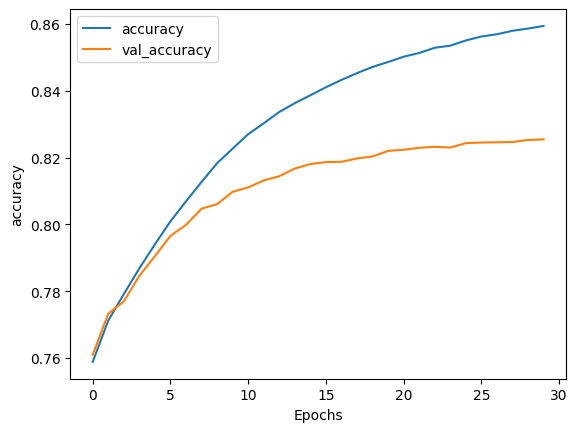

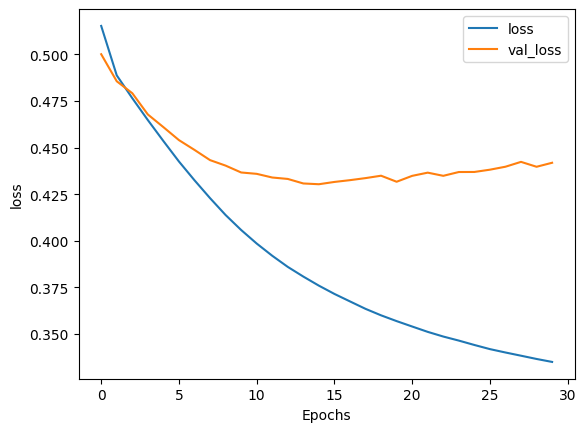

In [60]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_3_4_history, 'accuracy')
plot_graphs(lstm_model_3_4_history, 'loss')

The model "lstm_model_3_4" summary:

1. Training accuracy: 86% 
2. Validation accuracy: 82% 
3. Total training time: around 18 mins for 30 epochs and 128 batch size. 
4. Validation: Pass

In [61]:
# Call the function to add a new row
df_opt_models = add_row(df_opt_models, "lstm_model_3_4", 86, 82, 18, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

        Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
  lstm_model_3             89            84                 27       Pass
lstm_model_3_1             88            83                 25       Pass
lstm_model_3_2             87            83                 22       Pass
lstm_model_3_3             86            83                 18       Pass
lstm_model_3_4             86            82                 18       Pass


## LSTM 3.5 model

In [62]:
# Hyperparameters
embedding_dim = 44 # dim of dense vector of word representation
lstm_dim = 34 # nums of LSTM units
dense_dim = 64 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [63]:
# Build the model
lstm_model_3_5 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_3_5.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_3_5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 10, 44)            22000     
                                                                 
 bidirectional_9 (Bidirectio  (None, 68)               21488     
 nal)                                                            
                                                                 
 dense_18 (Dense)            (None, 64)                4416      
                                                                 
 dense_19 (Dense)            (None, 3)                 195       
                                                                 
Total params: 48,099
Trainable params: 48,099
Non-trainable params: 0
_________________________________________________________________


In [64]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_3_5_history = lstm_model_3_5.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.5180 - accuracy: 0.7570 - val_loss: 0.5012 - val_accuracy: 0.7619
Epoch 2/30
5654/5654 [==============================] - 34s 6ms/step - loss: 0.4910 - accuracy: 0.7697 - val_loss: 0.4910 - val_accuracy: 0.7699
Epoch 3/30
5654/5654 [==============================] - 34s 6ms/step - loss: 0.4799 - accuracy: 0.7768 - val_loss: 0.4832 - val_accuracy: 0.7740
Epoch 4/30
5654/5654 [==============================] - 34s 6ms/step - loss: 0.4700 - accuracy: 0.7830 - val_loss: 0.4732 - val_accuracy: 0.7800
Epoch 5/30
5654/5654 [==============================] - 34s 6ms/step - loss: 0.4603 - accuracy: 0.7895 - val_loss: 0.4662 - val_accuracy: 0.7853
Epoch 6/30
5654/5654 [==============================] - 34s 6ms/step - loss: 0.4506 - accuracy: 0.7954 - val_loss: 0.4600 - val_accuracy: 0.7902
Epoch 7/30
5654/5654 [==============================] - 34s 6ms/step - loss: 0.4411 - accuracy: 0.8015 - val_loss: 0.4555 - val_ac

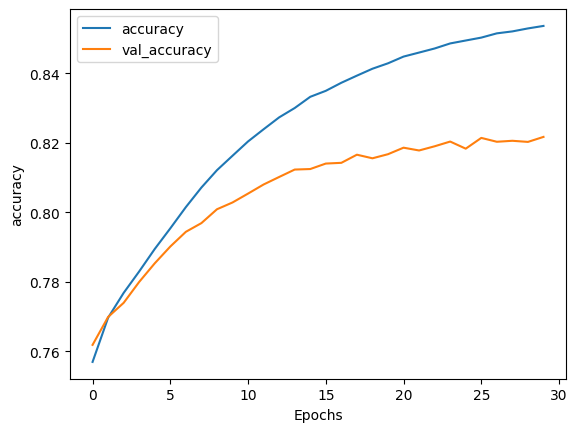

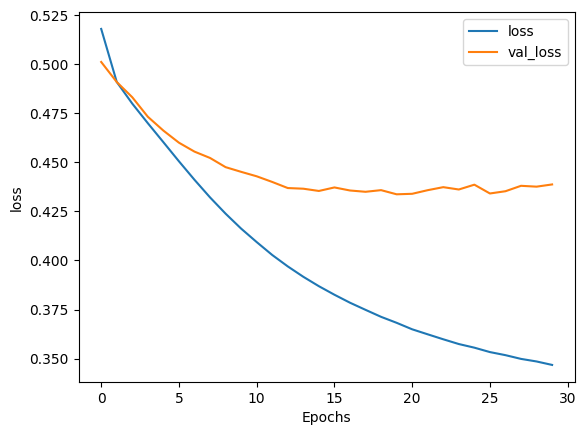

In [65]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_3_5_history, 'accuracy')
plot_graphs(lstm_model_3_5_history, 'loss')

The model "lstm_model_3_5" summary:

1. Training accuracy: 85% 
2. Validation accuracy: 82% 
3. Total training time: around 17 mins for 30 epochs and 128 batch size. 
4. Validation: Pass

In [66]:
# Call the function to add a new row
df_opt_models = add_row(df_opt_models, "lstm_model_3_5", 85, 82, 17, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

        Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
  lstm_model_3             89            84                 27       Pass
lstm_model_3_1             88            83                 25       Pass
lstm_model_3_2             87            83                 22       Pass
lstm_model_3_3             86            83                 18       Pass
lstm_model_3_4             86            82                 18       Pass
lstm_model_3_5             85            82                 17       Pass


## LSTM 3.6 model

In [67]:
# Hyperparameters
embedding_dim = 34 # dim of dense vector of word representation
lstm_dim = 34 # nums of LSTM units
dense_dim = 64 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [68]:
# Build the model
lstm_model_3_6 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_3_6.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_3_6.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 10, 34)            17000     
                                                                 
 bidirectional_10 (Bidirecti  (None, 68)               18768     
 onal)                                                           
                                                                 
 dense_20 (Dense)            (None, 64)                4416      
                                                                 
 dense_21 (Dense)            (None, 3)                 195       
                                                                 
Total params: 40,379
Trainable params: 40,379
Non-trainable params: 0
_________________________________________________________________


In [69]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_3_6_history = lstm_model_3_6.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 35s 6ms/step - loss: 0.5187 - accuracy: 0.7572 - val_loss: 0.5033 - val_accuracy: 0.7597
Epoch 2/30
5654/5654 [==============================] - 33s 6ms/step - loss: 0.4924 - accuracy: 0.7685 - val_loss: 0.4904 - val_accuracy: 0.7697
Epoch 3/30
5654/5654 [==============================] - 33s 6ms/step - loss: 0.4815 - accuracy: 0.7755 - val_loss: 0.4841 - val_accuracy: 0.7730
Epoch 4/30
5654/5654 [==============================] - 33s 6ms/step - loss: 0.4721 - accuracy: 0.7817 - val_loss: 0.4751 - val_accuracy: 0.7797
Epoch 5/30
5654/5654 [==============================] - 33s 6ms/step - loss: 0.4633 - accuracy: 0.7871 - val_loss: 0.4686 - val_accuracy: 0.7842
Epoch 6/30
5654/5654 [==============================] - 33s 6ms/step - loss: 0.4545 - accuracy: 0.7928 - val_loss: 0.4637 - val_accuracy: 0.7884
Epoch 7/30
5654/5654 [==============================] - 33s 6ms/step - loss: 0.4460 - accuracy: 0.7982 - val_loss: 0.4589 - val_ac

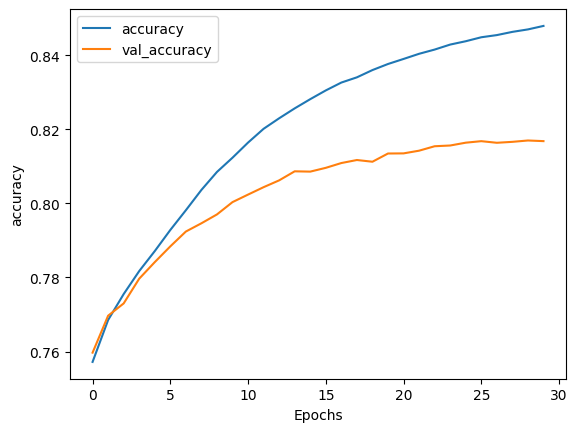

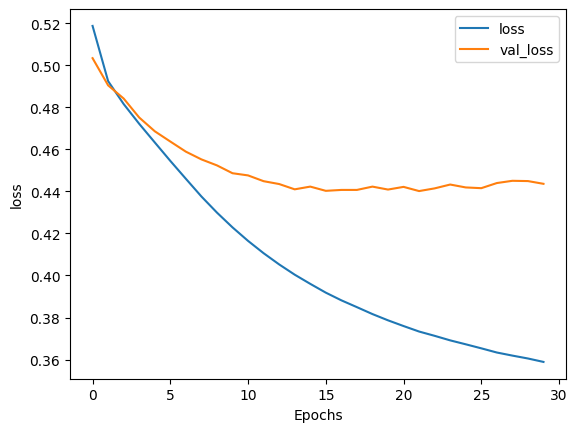

In [70]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_3_6_history, 'accuracy')
plot_graphs(lstm_model_3_6_history , 'loss')

The model "lstm_model_3_6" summary:

1. Training accuracy: 85% 
2. Validation accuracy: 82% 
3. Total training time: around 16 mins for 30 epochs and 128 batch size. 
4. Validation: Pass

In [71]:
# Call the function to add a new row
df_opt_models = add_row(df_opt_models, "lstm_model_3_6", 85, 82, 16, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

        Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
  lstm_model_3             89            84                 27       Pass
lstm_model_3_1             88            83                 25       Pass
lstm_model_3_2             87            83                 22       Pass
lstm_model_3_3             86            83                 18       Pass
lstm_model_3_4             86            82                 18       Pass
lstm_model_3_5             85            82                 17       Pass
lstm_model_3_6             85            82                 16       Pass


Next. it will adjust the dense_dim hyperparameter to find the best model.

## LSTM 3.7 model

In [72]:
# Hyperparameters
embedding_dim = 64 # dim of dense vector of word representation
lstm_dim = 34 # nums of LSTM units
dense_dim = 54 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [73]:
# Build the model
lstm_model_3_7 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_3_7.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_3_7.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 10, 64)            32000     
                                                                 
 bidirectional_11 (Bidirecti  (None, 68)               26928     
 onal)                                                           
                                                                 
 dense_22 (Dense)            (None, 54)                3726      
                                                                 
 dense_23 (Dense)            (None, 3)                 165       
                                                                 
Total params: 62,819
Trainable params: 62,819
Non-trainable params: 0
_________________________________________________________________


In [74]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_3_7_history = lstm_model_3_7.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 39s 7ms/step - loss: 0.5149 - accuracy: 0.7590 - val_loss: 0.4990 - val_accuracy: 0.7625
Epoch 2/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4873 - accuracy: 0.7722 - val_loss: 0.4853 - val_accuracy: 0.7735
Epoch 3/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4749 - accuracy: 0.7801 - val_loss: 0.4767 - val_accuracy: 0.7786
Epoch 4/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4624 - accuracy: 0.7882 - val_loss: 0.4659 - val_accuracy: 0.7857
Epoch 5/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4498 - accuracy: 0.7965 - val_loss: 0.4591 - val_accuracy: 0.7914
Epoch 6/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4376 - accuracy: 0.8038 - val_loss: 0.4515 - val_accuracy: 0.7974
Epoch 7/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4263 - accuracy: 0.8110 - val_loss: 0.4457 - val_ac

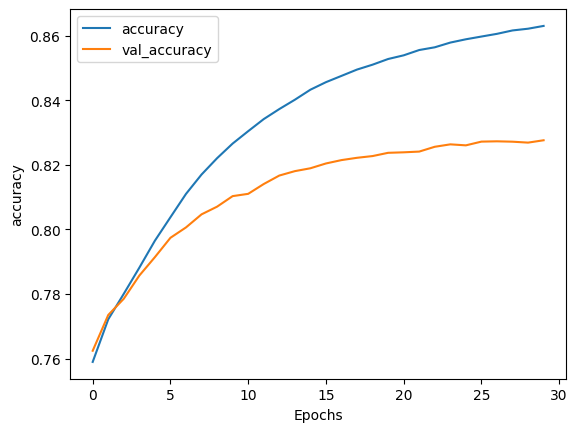

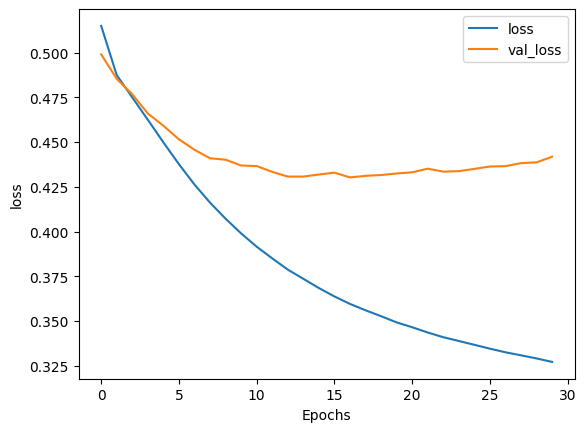

In [75]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_3_7_history, 'accuracy')
plot_graphs(lstm_model_3_7_history, 'loss')

The model "lstm_model_3_7" summary:

1. Training accuracy: 86% 
2. Validation accuracy: 83% 
3. Total training time: around 18 mins for 30 epochs and 128 batch size. 
4. Validation: Pass

In [76]:
# Call the function to add a new row
df_opt_models = add_row(df_opt_models, "lstm_model_3_7", 86, 83, 18, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

        Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
  lstm_model_3             89            84                 27       Pass
lstm_model_3_1             88            83                 25       Pass
lstm_model_3_2             87            83                 22       Pass
lstm_model_3_3             86            83                 18       Pass
lstm_model_3_4             86            82                 18       Pass
lstm_model_3_5             85            82                 17       Pass
lstm_model_3_6             85            82                 16       Pass
lstm_model_3_7             86            83                 18       Pass


## LSTM 3.8 model 


In [77]:
# Hyperparameters
embedding_dim = 64 # dim of dense vector of word representation
lstm_dim = 34 # nums of LSTM units
dense_dim = 44 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [78]:
# Build the model
lstm_model_3_8 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_3_8.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_3_8.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 10, 64)            32000     
                                                                 
 bidirectional_12 (Bidirecti  (None, 68)               26928     
 onal)                                                           
                                                                 
 dense_24 (Dense)            (None, 44)                3036      
                                                                 
 dense_25 (Dense)            (None, 3)                 135       
                                                                 
Total params: 62,099
Trainable params: 62,099
Non-trainable params: 0
_________________________________________________________________


In [79]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_3_8_history = lstm_model_3_8.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 39s 6ms/step - loss: 0.5149 - accuracy: 0.7588 - val_loss: 0.4987 - val_accuracy: 0.7632
Epoch 2/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4866 - accuracy: 0.7728 - val_loss: 0.4844 - val_accuracy: 0.7733
Epoch 3/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4735 - accuracy: 0.7812 - val_loss: 0.4770 - val_accuracy: 0.7788
Epoch 4/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4604 - accuracy: 0.7895 - val_loss: 0.4653 - val_accuracy: 0.7867
Epoch 5/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4481 - accuracy: 0.7973 - val_loss: 0.4583 - val_accuracy: 0.7929
Epoch 6/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4361 - accuracy: 0.8048 - val_loss: 0.4515 - val_accuracy: 0.7973
Epoch 7/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4254 - accuracy: 0.8111 - val_loss: 0.4457 - val_ac

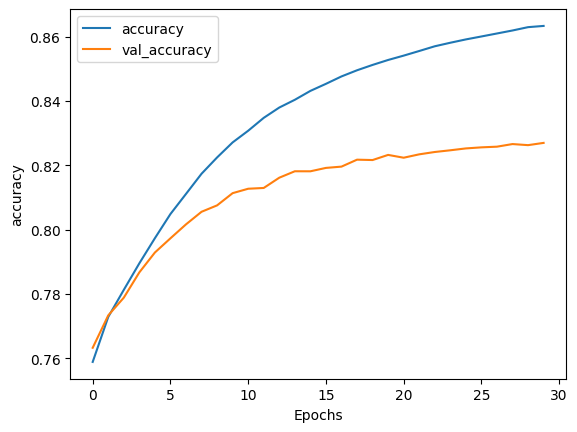

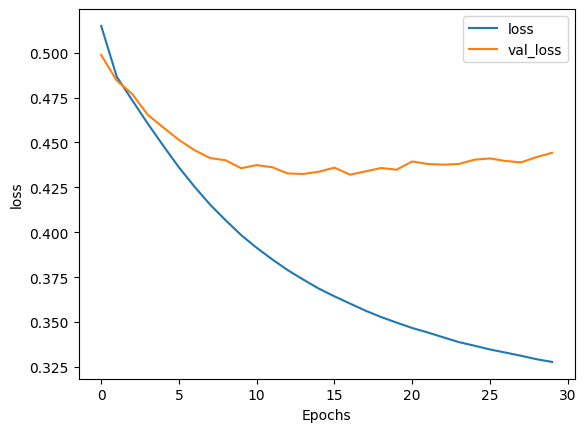

In [80]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_3_8_history, 'accuracy')
plot_graphs(lstm_model_3_8_history, 'loss')

The model "lstm_model_3_8" summary:

1. Training accuracy: 86% 
2. Validation accuracy: 83% 
3. Total training time: around 18 mins for 30 epochs and 128 batch size. 
4. Validation: Pass

In [81]:
# Call the function to add a new row
df_opt_models = add_row(df_opt_models, "lstm_model_3_8", 86, 83, 18, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

        Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
  lstm_model_3             89            84                 27       Pass
lstm_model_3_1             88            83                 25       Pass
lstm_model_3_2             87            83                 22       Pass
lstm_model_3_3             86            83                 18       Pass
lstm_model_3_4             86            82                 18       Pass
lstm_model_3_5             85            82                 17       Pass
lstm_model_3_6             85            82                 16       Pass
lstm_model_3_7             86            83                 18       Pass
lstm_model_3_8             86            83                 18       Pass


## LSTM 3.9 model

In [82]:
# Hyperparameters
embedding_dim = 64 # dim of dense vector of word representation
lstm_dim = 34 # nums of LSTM units
dense_dim = 34 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [83]:
# Build the model
lstm_model_3_9 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_3_9.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_3_9.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 10, 64)            32000     
                                                                 
 bidirectional_13 (Bidirecti  (None, 68)               26928     
 onal)                                                           
                                                                 
 dense_26 (Dense)            (None, 34)                2346      
                                                                 
 dense_27 (Dense)            (None, 3)                 105       
                                                                 
Total params: 61,379
Trainable params: 61,379
Non-trainable params: 0
_________________________________________________________________


In [84]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_3_9_history = lstm_model_3_9.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 39s 6ms/step - loss: 0.5150 - accuracy: 0.7589 - val_loss: 0.4995 - val_accuracy: 0.7621
Epoch 2/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4873 - accuracy: 0.7717 - val_loss: 0.4852 - val_accuracy: 0.7730
Epoch 3/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4743 - accuracy: 0.7804 - val_loss: 0.4775 - val_accuracy: 0.7786
Epoch 4/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4619 - accuracy: 0.7888 - val_loss: 0.4670 - val_accuracy: 0.7861
Epoch 5/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4499 - accuracy: 0.7964 - val_loss: 0.4601 - val_accuracy: 0.7914
Epoch 6/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4383 - accuracy: 0.8037 - val_loss: 0.4524 - val_accuracy: 0.7968
Epoch 7/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4278 - accuracy: 0.8105 - val_loss: 0.4474 - val_ac

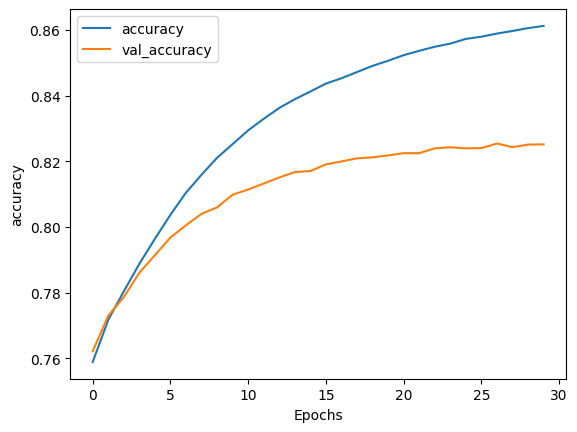

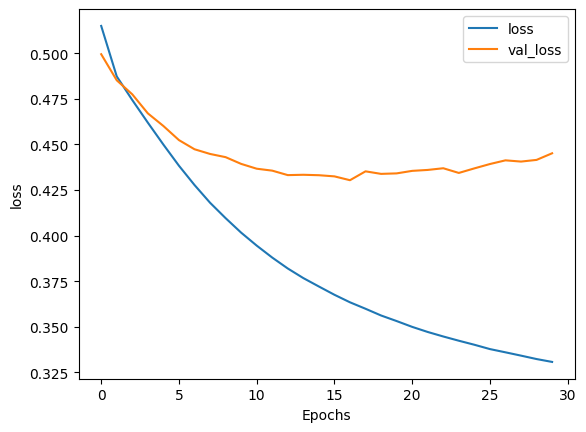

In [85]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_3_9_history, 'accuracy')
plot_graphs(lstm_model_3_9_history, 'loss')

The model "lstm_model_3_9" summary:

1. Training accuracy: 86% 
2. Validation accuracy: 83% 
3. Total training time: around 18 mins for 30 epochs and 128 batch size. 
4. Validation: Pass

In [86]:
# Call the function to add a new row
df_opt_models = add_row(df_opt_models, "lstm_model_3_9", 86, 83, 18, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

        Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
  lstm_model_3             89            84                 27       Pass
lstm_model_3_1             88            83                 25       Pass
lstm_model_3_2             87            83                 22       Pass
lstm_model_3_3             86            83                 18       Pass
lstm_model_3_4             86            82                 18       Pass
lstm_model_3_5             85            82                 17       Pass
lstm_model_3_6             85            82                 16       Pass
lstm_model_3_7             86            83                 18       Pass
lstm_model_3_8             86            83                 18       Pass
lstm_model_3_9             86            83                 18       Pass


## LSTM 3.10 model

In [87]:
# Hyperparameters
embedding_dim = 54 # dim of dense vector of word representation
lstm_dim = 54 # nums of LSTM units
dense_dim = 54 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [88]:
# Build the model
lstm_model_3_10 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_3_10.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_3_10.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 10, 54)            27000     
                                                                 
 bidirectional_14 (Bidirecti  (None, 108)              47088     
 onal)                                                           
                                                                 
 dense_28 (Dense)            (None, 54)                5886      
                                                                 
 dense_29 (Dense)            (None, 3)                 165       
                                                                 
Total params: 80,139
Trainable params: 80,139
Non-trainable params: 0
_________________________________________________________________


In [89]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_3_10_history = lstm_model_3_10.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 51s 9ms/step - loss: 0.5156 - accuracy: 0.7580 - val_loss: 0.5002 - val_accuracy: 0.7618
Epoch 2/30
5654/5654 [==============================] - 49s 9ms/step - loss: 0.4894 - accuracy: 0.7706 - val_loss: 0.4859 - val_accuracy: 0.7723
Epoch 3/30
5654/5654 [==============================] - 49s 9ms/step - loss: 0.4763 - accuracy: 0.7788 - val_loss: 0.4780 - val_accuracy: 0.7770
Epoch 4/30
5654/5654 [==============================] - 49s 9ms/step - loss: 0.4629 - accuracy: 0.7879 - val_loss: 0.4673 - val_accuracy: 0.7850
Epoch 5/30
5654/5654 [==============================] - 49s 9ms/step - loss: 0.4490 - accuracy: 0.7966 - val_loss: 0.4576 - val_accuracy: 0.7920
Epoch 6/30
5654/5654 [==============================] - 49s 9ms/step - loss: 0.4347 - accuracy: 0.8059 - val_loss: 0.4482 - val_accuracy: 0.7998
Epoch 7/30
5654/5654 [==============================] - 49s 9ms/step - loss: 0.4212 - accuracy: 0.8132 - val_loss: 0.4429 - val_ac

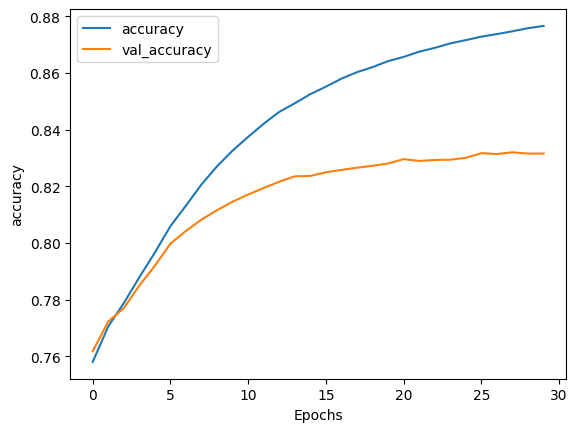

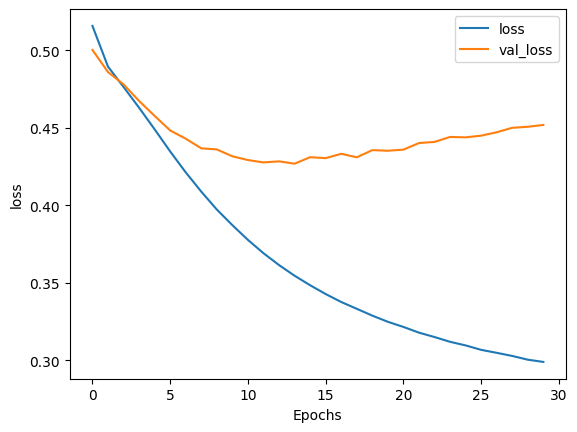

In [90]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_3_10_history, 'accuracy')
plot_graphs(lstm_model_3_10_history, 'loss')

The model "lstm_model_3_10" summary:

1. Training accuracy: 88% 
2. Validation accuracy: 83% 
3. Total training time: around 24 mins for 30 epochs and 128 batch size. 
4. Validation: Pass

In [91]:
# Call the function to add a new row
df_opt_models = add_row(df_opt_models, "lstm_model_3_10", 88, 83, 24, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

         Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
   lstm_model_3             89            84                 27       Pass
 lstm_model_3_1             88            83                 25       Pass
 lstm_model_3_2             87            83                 22       Pass
 lstm_model_3_3             86            83                 18       Pass
 lstm_model_3_4             86            82                 18       Pass
 lstm_model_3_5             85            82                 17       Pass
 lstm_model_3_6             85            82                 16       Pass
 lstm_model_3_7             86            83                 18       Pass
 lstm_model_3_8             86            83                 18       Pass
 lstm_model_3_9             86            83                 18       Pass
lstm_model_3_10             88            83                 24       Pass


## LSTM 3.11 model

In [92]:
# Hyperparameters
embedding_dim = 44 # dim of dense vector of word representation
lstm_dim = 44 # nums of LSTM units
dense_dim = 44 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [93]:
# Build the model
lstm_model_3_11 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_3_11.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_3_11.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 10, 44)            22000     
                                                                 
 bidirectional_15 (Bidirecti  (None, 88)               31328     
 onal)                                                           
                                                                 
 dense_30 (Dense)            (None, 44)                3916      
                                                                 
 dense_31 (Dense)            (None, 3)                 135       
                                                                 
Total params: 57,379
Trainable params: 57,379
Non-trainable params: 0
_________________________________________________________________


In [94]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_3_11_history = lstm_model_3_11.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 44s 7ms/step - loss: 0.5171 - accuracy: 0.7575 - val_loss: 0.5004 - val_accuracy: 0.7609
Epoch 2/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4901 - accuracy: 0.7700 - val_loss: 0.4880 - val_accuracy: 0.7713
Epoch 3/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4784 - accuracy: 0.7777 - val_loss: 0.4813 - val_accuracy: 0.7758
Epoch 4/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4670 - accuracy: 0.7846 - val_loss: 0.4696 - val_accuracy: 0.7832
Epoch 5/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4561 - accuracy: 0.7918 - val_loss: 0.4635 - val_accuracy: 0.7875
Epoch 6/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4451 - accuracy: 0.7987 - val_loss: 0.4559 - val_accuracy: 0.7937
Epoch 7/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4346 - accuracy: 0.8052 - val_loss: 0.4508 - val_ac

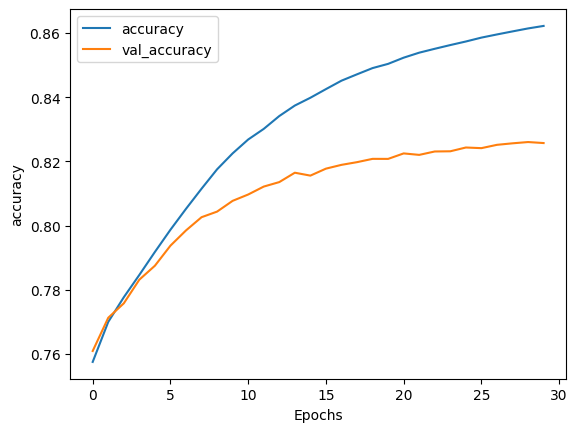

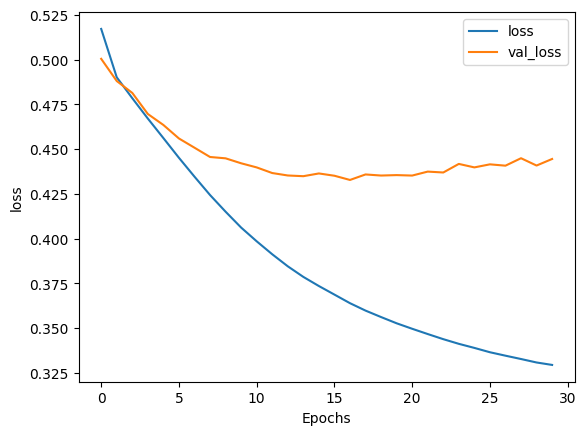

In [95]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_3_11_history, 'accuracy')
plot_graphs(lstm_model_3_11_history, 'loss')

The model "lstm_model_3_11" summary:

1. Training accuracy: 86% 
2. Validation accuracy: 83% 
3. Total training time: around 21 mins for 30 epochs and 128 batch size. 
4. Validation: Pass

In [96]:
# Call the function to add a new row
df_opt_models = add_row(df_opt_models, "lstm_model_3_11", 86, 83, 21, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

         Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
   lstm_model_3             89            84                 27       Pass
 lstm_model_3_1             88            83                 25       Pass
 lstm_model_3_2             87            83                 22       Pass
 lstm_model_3_3             86            83                 18       Pass
 lstm_model_3_4             86            82                 18       Pass
 lstm_model_3_5             85            82                 17       Pass
 lstm_model_3_6             85            82                 16       Pass
 lstm_model_3_7             86            83                 18       Pass
 lstm_model_3_8             86            83                 18       Pass
 lstm_model_3_9             86            83                 18       Pass
lstm_model_3_10             88            83                 24       Pass
lstm_model_3_11             86            83                 21       Pass


## LSTM 3.12 model

In [97]:
# Hyperparameters
embedding_dim = 34 # dim of dense vector of word representation
lstm_dim = 34 # nums of LSTM units
dense_dim = 34 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [98]:
# Build the model
lstm_model_3_12 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_3_12.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_3_12.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 10, 34)            17000     
                                                                 
 bidirectional_16 (Bidirecti  (None, 68)               18768     
 onal)                                                           
                                                                 
 dense_32 (Dense)            (None, 34)                2346      
                                                                 
 dense_33 (Dense)            (None, 3)                 105       
                                                                 
Total params: 38,219
Trainable params: 38,219
Non-trainable params: 0
_________________________________________________________________


In [99]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_3_12_history = lstm_model_3_12.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 35s 6ms/step - loss: 0.5185 - accuracy: 0.7569 - val_loss: 0.5047 - val_accuracy: 0.7587
Epoch 2/30
5654/5654 [==============================] - 33s 6ms/step - loss: 0.4933 - accuracy: 0.7676 - val_loss: 0.4919 - val_accuracy: 0.7685
Epoch 3/30
5654/5654 [==============================] - 33s 6ms/step - loss: 0.4830 - accuracy: 0.7742 - val_loss: 0.4855 - val_accuracy: 0.7720
Epoch 4/30
5654/5654 [==============================] - 33s 6ms/step - loss: 0.4735 - accuracy: 0.7806 - val_loss: 0.4758 - val_accuracy: 0.7789
Epoch 5/30
5654/5654 [==============================] - 33s 6ms/step - loss: 0.4650 - accuracy: 0.7863 - val_loss: 0.4704 - val_accuracy: 0.7828
Epoch 6/30
5654/5654 [==============================] - 33s 6ms/step - loss: 0.4566 - accuracy: 0.7918 - val_loss: 0.4655 - val_accuracy: 0.7877
Epoch 7/30
5654/5654 [==============================] - 33s 6ms/step - loss: 0.4488 - accuracy: 0.7974 - val_loss: 0.4621 - val_ac

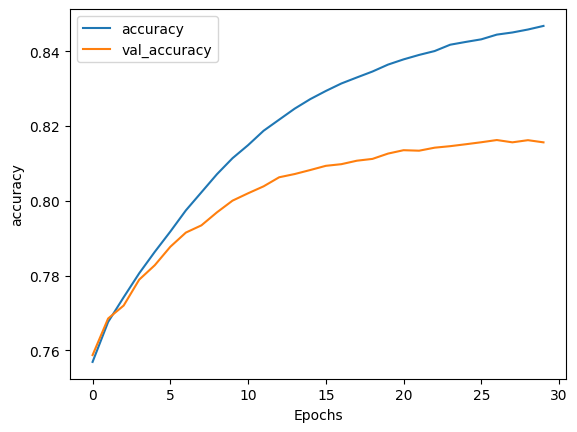

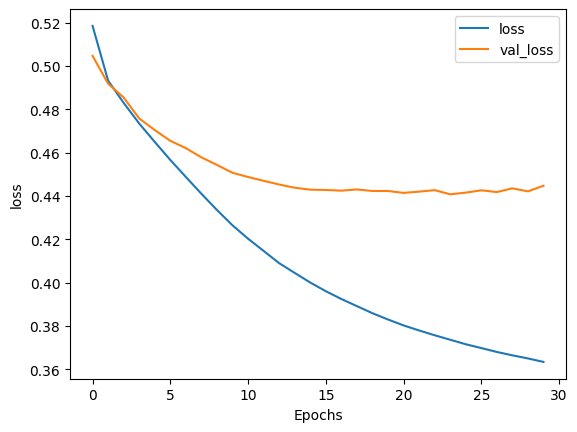

In [100]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_3_12_history, 'accuracy')
plot_graphs(lstm_model_3_12_history, 'loss')

The model "lstm_model_3_12" summary:

1. Training accuracy: 85% 
2. Validation accuracy: 82% 
3. Total training time: around 16 mins for 30 epochs and 128 batch size. 
4. Validation: Pass

In [101]:
# Call the function to add a new row
df_opt_models = add_row(df_opt_models, "lstm_model_3_12", 85, 82, 16, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

         Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
   lstm_model_3             89            84                 27       Pass
 lstm_model_3_1             88            83                 25       Pass
 lstm_model_3_2             87            83                 22       Pass
 lstm_model_3_3             86            83                 18       Pass
 lstm_model_3_4             86            82                 18       Pass
 lstm_model_3_5             85            82                 17       Pass
 lstm_model_3_6             85            82                 16       Pass
 lstm_model_3_7             86            83                 18       Pass
 lstm_model_3_8             86            83                 18       Pass
 lstm_model_3_9             86            83                 18       Pass
lstm_model_3_10             88            83                 24       Pass
lstm_model_3_11             86            83                 21       Pass
lstm_model_3_12          

Summary of models comparison:

Overall, the training time ranges from 16 mins to 27 mins, the training accuracy ranges from 85% to 89%, and the validation accuracy ranges from 82% to 84%. Among the models, "lstm_model_3_2" stands out as the most efficient model, exhibiting a commendable training accuracy of 87% and a validation accuracy of 83%. Additionally, it accomplishes this performance while maintaining a relatively low training time of 22 mins.

Next, save the trainned model for further prediction or application development.

In [102]:
# Save the fitted LSTM model to a file
model_save_path = "models/lstm_model_3_2.h5"
lstm_model_3_2.save(model_save_path)